# Project2 Part1 - Text Analysis through TFIDF computation


In [4]:
from text_analyzer import read_sonnets, clean_corpus, tf, get_top_k, idf, tf_idf, cosine_sim, euclidean_distance, manhattan_distance, bm25

import pandas as pd

%load_ext autoreload
%autoreload 2

In [5]:
# run text_analyzer.py with default arguments
!python text_analyzer.py

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)

Sonnet 1 TF (Top 20):
[('the', 6), ('thy', 5), ('to', 4), ('and', 3), ('that', 2), ('might', 2), ('but', 2), ('by', 2), ('his', 2), ('tender', 2), ('thou', 2), ('thine', 2), ('own', 2), ('self', 2), ('worlds', 2), ('from', 1), ('fairest', 1), ('creatures', 1), ('we', 1), ('desire', 1)]
Corpus TF (Top 20):
[('and', 491), ('the', 430), ('to', 408), ('my', 397), ('of', 372), ('i', 343), ('in', 322), ('that', 320), ('thy', 287), ('thou', 235), ('with', 181), ('for', 171), ('is', 168), ('a', 166), ('not', 166), ('me', 164), ('but', 163), ('thee', 162), ('love', 162), ('so', 144)]
Corpus IDF (Top 20):
[('beweep', 5.0369526024136295), ('outcast', 5.0369526024136295), ('trou

## a. Read about argparse.
Look at its implementation in the Python Script. Follow the instruction and answer the questions in the Argparse section.

`argparse` is a python module that gives developers command-line tools. It makes
it easy to write user-friendly command-line interfaces. One can add arguments 
to the interface by using `add_argument()` and then retrieve user input using
parse_args. This is used in a variety of features such as handling positional 
arguments, specifying default values, grouping arguments, and more.


## b. Read and Clean the data

In [6]:
d_corpus='data/shakespeare_sonnets/'

# return dictionary with keys corresponding to file names and values being the respective contents
corpus = read_sonnets(d_corpus)

# return corpus (dict) with each sonnet cleaned and tokenized for further processing
corpus = clean_corpus(corpus)

In [4]:
corpus['1']

['from',
 'fairest',
 'creatures',
 'we',
 'desire',
 'increase',
 'that',
 'thereby',
 'beautys',
 'rose',
 'might',
 'never',
 'die',
 'but',
 'as',
 'the',
 'riper',
 'should',
 'by',
 'time',
 'decease',
 'his',
 'tender',
 'heir',
 'might',
 'bear',
 'his',
 'memory',
 'but',
 'thou',
 'contracted',
 'to',
 'thine',
 'own',
 'bright',
 'eyes',
 'feedst',
 'thy',
 'lights',
 'flame',
 'with',
 'selfsubstantial',
 'fuel',
 'making',
 'a',
 'famine',
 'where',
 'abundance',
 'lies',
 'thy',
 'self',
 'thy',
 'foe',
 'to',
 'thy',
 'sweet',
 'self',
 'too',
 'cruel',
 'thou',
 'that',
 'art',
 'now',
 'the',
 'worlds',
 'fresh',
 'ornament',
 'and',
 'only',
 'herald',
 'to',
 'the',
 'gaudy',
 'spring',
 'within',
 'thine',
 'own',
 'bud',
 'buriest',
 'thy',
 'content',
 'and',
 'tender',
 'churl',
 'makst',
 'waste',
 'in',
 'niggarding',
 'pity',
 'the',
 'world',
 'or',
 'else',
 'this',
 'glutton',
 'be',
 'to',
 'eat',
 'the',
 'worlds',
 'due',
 'by',
 'the',
 'grave',
 'and',

## c. TF

In [5]:
# assign 1.txt to variable sonnet to process and find its TF (Note corpus is of type dic, but sonnet1 is just a str)
sonnet1 = corpus['1']


# determine tf of sonnet
sonnet1_tf = tf(sonnet1)
# get sorted list and slice out top 20
sonnet1_top20 = get_top_k(sonnet1_tf)
# print
# print("Sonnet 1 (Top 20):")
df = pd.DataFrame(sonnet1_top20, columns=["word", "count"])
df.head(20)

,word,count
0,the,6
1,thy,5
2,to,4
3,and,3
4,that,2
5,might,2
6,but,2
7,by,2
8,his,2
9,tender,2


In [6]:
# TF of entire corpus
flattened_corpus = [word for sonnet in corpus.values() for word in sonnet]
corpus_tf = tf(flattened_corpus)
corpus_top20 = get_top_k(corpus_tf)
# print
# print("Corpus TF (Top 20):")
df = pd.DataFrame(corpus_top20, columns=["word", "count"])
df.head(20)

,word,count
0,and,491
1,the,430
2,to,408
3,my,397
4,of,372
5,i,343
6,in,322
7,that,320
8,thy,287
9,thou,235


### Q: Discussion
Do you believe the most frequent words would discriminate between documents well? Why or why not? Any thoughts on how we can improve this representation? Does there appear to be any ‘noise’? If so, where? If not, it should be clear by the end of the assignment.

Not necessarily, no. The most frequent words may not necessarily be good way to discriminate between documents as some words happen to always be frequent (the, be, a, with) and can't be informative enough. Words like these don't carry much semantic meaning. There should be better ways of capturing the words that describe the document. The noise TF captures can be attributed to its basis on frequency alone. IDF would be a better way to see words that describe the documents better.

## d. IDF

In [7]:
# IDF of corpus
corpus_idf = idf(corpus)
corpus_tf_ordered = get_top_k(corpus_idf)
# print top 20 to add to report
df = pd.DataFrame(corpus_tf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,beweep,5.036953
1,outcast,5.036953
2,trouble,5.036953
3,deaf,5.036953
4,bootless,5.036953
5,fate,5.036953
6,wishing,5.036953
7,featured,5.036953
8,desiring,5.036953
9,mans,5.036953


### Q: observe and briefly comment on the difference in top 20 lists (comparing TF of corpus vs its IDF).

The top 20 list of TF shows the words that occured most frequently in the corpus. Usually these are the very common words (the, a) or words that are topic-related to the corpus (love). On the other hand, the IDF shows the most important words in the corpus (sharpst, wasted). The might be words that occured in less number of documents but probably more informative.

## e. TF-IDF

In [8]:
# TFIDF of Sonnet1 w.r.t. corpus
sonnet1_tfidf = tf_idf(corpus_idf, sonnet1_tf)
sonnet1_tfidf_ordered = get_top_k(sonnet1_tfidf)
# print
# print("Sonnet 1 TFIDF (Top 20):")
df = pd.DataFrame(sonnet1_tfidf_ordered, columns=["word", "score"])
df.head(20)

,word,score
0,worlds,7.301316
1,tender,6.490386
2,feedst,5.036953
3,lights,5.036953
4,selfsubstantial,5.036953
5,fuel,5.036953
6,famine,5.036953
7,foe,5.036953
8,herald,5.036953
9,gaudy,5.036953


### Q. What is different with this list than just using TF?

TF only focuses on term frequency, so it predicts higher importance for words that appear more. It doesn't take into account if that term is common across all documents or not. That's why a more frequent term may not be very informative about a specific document and a less frequently occuring term may be more informative. TF-IDF on the other hand takes into account both the frequency of the term and its inverse document frequency. This measures how common or rare a term is across documents. The IDF factor in TF-IDF up-weights the importance of rare items and down-weights that of more common ones.  

## f. Compare all documents

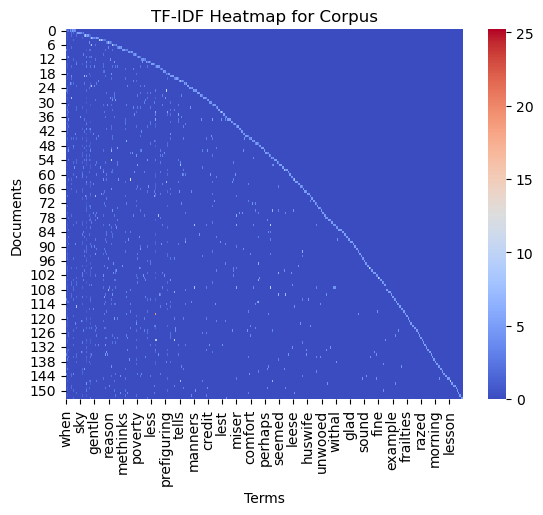

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume we have a list of dictionaries, where each dictionary represents the TF-IDF scores
# for a document in the corpus, with the keys being the terms and the values being the scores.
file_to_tf_idf = []
for doc, sonnet in corpus.items():
    sonnet_tf = tf(sonnet)
    sonnet_tfidf = tf_idf(corpus_idf, sonnet_tf)
    file_to_tf_idf.append(sonnet_tfidf)
    
# TFIDFbyFile = [ tf_idf() for _ in corpus.items()]

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(file_to_tf_idf)
df = df.fillna(0)
df

sns.heatmap(df, cmap='coolwarm')

# # Add labels and title to the plot
plt.xlabel('Terms')
plt.ylabel('Documents')
plt.title('TF-IDF Heatmap for Corpus')
plt.show()

### Q. Observe the heatmap. What insight do you get from it?

In the heatmap I have plotted, the y-axis represents the documents in your corpus and the x-axis represents the terms in your vocabulary. The heatmap shows the TF-IDF scores for each term in each document:
Couple of observations:
1. Most frequent terms across documets appear to be a mix of both some important and informative (eg: poverty) and other not very informative terms (eg: when)
2. Using tf-idf showed us more information about how unique every document is. Since some terms have high tf-idf scores in some documents but not the others, making these terms good discriminators.
3. Noise still is a factor: eventhough 'sky', 'poverty', 'miser' and 'frailties' might seem important and informative, yet 'when', 'perhaps' and 'example' can be misleading. 
4. Some terms have high tf-idf in the same documents, making these documents related as a group.

# 3. Bonus part of the project

## a. Add functions called euclidean distance and manhattan distance.
Process the documents using the new metric, analyze and discuss the differences between these and cosine
similarity

In [10]:
import random

# assuming you have already loaded the corpus into a dictionary called `corpus`

# select two random documents
doc1, doc2 = random.sample(sorted(corpus.keys()), 2)

# calculate tf-idf vectors for each document
vec1 = tf_idf(idf(corpus), tf(corpus[doc1]))
vec2 = tf_idf(idf(corpus), tf(corpus[doc2]))

# calculate the distances between the vectors using the three metrics
euclidean_dist = euclidean_distance(vec1, vec2)
manhattan_dist = manhattan_distance(vec1, vec2)
cosine_simulation = cosine_sim(vec1, vec2)

# print the results
print(f"Euclidean distance between '{doc1}' and '{doc2}': {euclidean_dist:.4f}")
print(f"Manhattan distance between '{doc1}' and '{doc2}': {manhattan_dist:.4f}")
print(f"Cosine similarity between '{doc1}' and '{doc2}': {cosine_simulation:.4f}")

Euclidean distance between '108' and '114': 4.9860
Manhattan distance between '108' and '114': 437.8456
Cosine similarity between '108' and '114': 0.0666


## Analysis of the difference between the metrics:

In terms of the differences between the first two metrics and cosine similarity, it's worth noting that the first two are distance metrics, while cosine similarity is a similarity metric. This means that the first two measure the dissimilarity between the two vectors, while cosine similarity measures the similarity between them.

Euclidean distance and Manhattan distance both measure the distance between two points in a multi-dimensional space. In this case, the space is defined by the set of terms that appear in the documents. Euclidean distance is the "straight-line" distance between the two points, while Manhattan distance is the sum of the absolute differences between their coordinates.

Cosine similarity, on the other hand, measures the cosine of the angle between the two vectors. It's a measure of how similar the directions of the two vectors are, regardless of their magnitudes. Cosine similarity ranges from -1 (perfectly dissimilar) to 1 (perfectly similar), with 0 indicating no similarity.

# BM25 scores
## Look at top 20 words in doc 1 in the corpus:
Create a cosine similarity matrix and compare it to that from part 1

In [11]:
import numpy as np
doc1_text = corpus['1']
# Get the TF-IDF vectors for all documents in the corpus
bm25_vectors = [bm25(corpus, k1=1.5, b=0.75)[doc] for doc in corpus.keys()]
cos_sim_matrix = np.zeros((len(bm25_vectors), len(bm25_vectors)))
for i in range(len(bm25_vectors)):
    for j in range(len(bm25_vectors)):
        if i == j:
            cos_sim_matrix[i][j] = 1.0
        else:
            cos_sim_matrix[i][j] = cosine_sim(bm25_vectors[i], bm25_vectors[j])

# Get the top 20 words in document 1.txt
doc1_bm25 = bm25(corpus, k1=1.5, b=0.75)['1']
top_words_doc1 = get_top_k(doc1_bm25, k=20)

# Print the top words in document 1.txt
print("Top words in document 1.txt:")
for word, score in top_words_doc1:
    print(f"{word}: {score:.3f}")

# Print the cosine similarity matrix
print("\nCosine similarity matrix:")
print(cos_sim_matrix)

Top words in document 1.txt:
worlds: 5.619
foe: 5.395
glutton: 5.395
niggarding: 5.395
herald: 5.395
feedst: 5.395
selfsubstantial: 5.395
fuel: 5.395
lights: 5.395
gaudy: 5.395
buriest: 5.395
famine: 5.395
tender: 5.035
creatures: 4.800
content: 4.800
churl: 4.800
makst: 4.800
contracted: 4.800
bud: 4.800
riper: 4.800

Cosine similarity matrix:
[[1.         0.05420972 0.01730887 ... 0.02765314 0.01845214 0.0365299 ]
 [0.05420972 1.         0.02260724 ... 0.02804595 0.01739141 0.04563644]
 [0.01730887 0.02260724 1.         ... 0.02579375 0.05618298 0.03406537]
 ...
 [0.02765314 0.02804595 0.02579375 ... 1.         0.03174028 0.02739404]
 [0.01845214 0.01739141 0.05618298 ... 0.03174028 1.         0.00966203]
 [0.0365299  0.04563644 0.03406537 ... 0.02739404 0.00966203 1.        ]]


In [13]:
%pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


# Use `SBERT` to determine document similarity

In [7]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = corpus['1']

sentences2 = corpus['2']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

from 		 when 		 Score: 0.4564
fairest 		 forty 		 Score: 0.2128
creatures 		 winters 		 Score: 0.3084
we 		 shall 		 Score: 0.3706
desire 		 besiege 		 Score: 0.2570
increase 		 thy 		 Score: 0.2716
that 		 brow 		 Score: 0.3011
thereby 		 and 		 Score: 0.3313
beautys 		 dig 		 Score: 0.2423
rose 		 deep 		 Score: 0.3384
might 		 trenches 		 Score: 0.1247
never 		 in 		 Score: 0.2427
die 		 thy 		 Score: 0.3451
but 		 beautys 		 Score: 0.2177
as 		 field 		 Score: 0.2200
the 		 thy 		 Score: 0.3802
riper 		 youths 		 Score: 0.1511
should 		 proud 		 Score: 0.2494
by 		 livery 		 Score: 0.2051
time 		 so 		 Score: 0.2924
decease 		 gazed 		 Score: 0.2665
his 		 on 		 Score: 0.3681
tender 		 now 		 Score: 0.2458
heir 		 will 		 Score: 0.2382
might 		 be 		 Score: 0.2057
bear 		 a 		 Score: 0.3270
his 		 tattered 		 Score: 0.1984
memory 		 weed 		 Score: 0.3500
but 		 of 		 Score: 0.4148
thou 		 small 		 Score: 0.2777
contracted 		 worth 		 Score: 0.1690
to 		 held 		 Score: 0.3390
thine 